In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("../src"))

from config import DATA_RAW_PATH, DATA_PROCESSED_PATH, TARGET_COLUMN, RANDOM_STATE
from model import train_decision_tree, train_random_forest

import pandas as pd

df = pd.read_csv(DATA_RAW_PATH)

# -----------------------------
# BASIC CLEANING
# -----------------------------

# Dropped columns that must NOT be used as features
df.drop(columns=["PatientID", "DoctorInCharge"], inplace=True)

# Filled missing values
df.fillna(0, inplace=True)

# -----------------------------
# ENCODING CATEGORICAL FEATURES
# -----------------------------

categorical_cols = [
    "Gender",
    "Ethnicity",
    "EducationLevel",
    "Smoking",
    "FamilyHistoryAlzheimers",
    "CardiovascularDisease",
    "Diabetes",
    "Depression",
    "HeadInjury",
    "Hypertension"
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# -----------------------------
# SAVED CLEAN DATA
# -----------------------------
df.to_csv(DATA_PROCESSED_PATH, index=False)
print("Processed data saved to:", DATA_PROCESSED_PATH)

# -----------------------------
# TRAINED MODELS
# -----------------------------
dt_model, X_test_dt, y_test_dt, y_pred_dt = train_decision_tree(df)
rf_model, X_test_rf, y_test_rf, y_pred_rf = train_random_forest(df)


Processed data saved to: C:\Users\Admin\PycharmProjects\Alzheimers_Disease_Diagnosis_ML\medical_diagnosis_system\data\processed\alzheimers_clean.csv


In [2]:
from sklearn.metrics import classification_report, confusion_matrix

print("\n=== Decision Tree Results ===")
print(classification_report(y_test_dt, y_pred_dt))

print("\n=== Random Forest Results ===")
print(classification_report(y_test_rf, y_pred_rf))



=== Decision Tree Results ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       278
           1       0.88      0.89      0.88       152

    accuracy                           0.92       430
   macro avg       0.91      0.91      0.91       430
weighted avg       0.92      0.92      0.92       430


=== Random Forest Results ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.94      0.89      0.92       152

    accuracy                           0.94       430
   macro avg       0.94      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



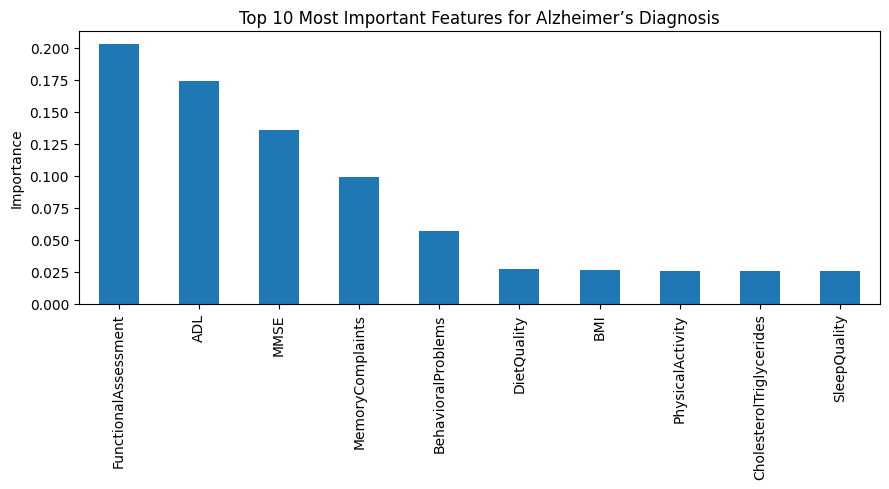

FunctionalAssessment        0.202810
ADL                         0.174392
MMSE                        0.135720
MemoryComplaints            0.098725
BehavioralProblems          0.056708
DietQuality                 0.027223
BMI                         0.025930
PhysicalActivity            0.025222
CholesterolTriglycerides    0.025207
SleepQuality                0.025133
dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X_test_rf.columns

fi = pd.Series(importances, index=features).sort_values(ascending=False).head(10)

plt.figure(figsize=(9,5))
fi.plot(kind="bar")
plt.title("Top 10 Most Important Features for Alzheimer’s Diagnosis")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print(fi)


In [4]:
# from utils import save_model
# from config import MODEL_PATH
#
# save_model(rf_model, MODEL_PATH)
# print("Model saved at:", MODEL_PATH)


Model saved at: C:\Users\Admin\PycharmProjects\Alzheimers_Disease_Diagnosis_ML\medical_diagnosis_system\models\diagnosis_model.pkl
